<a href="https://colab.research.google.com/github/sarahejaz/gonotes/blob/main/Audio_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install soundfile

In [ ]:
import librosa
import numpy as np
import soundfile as sf


#path of the audio file 

audio_data = '/content/audio.wav'

#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22Kx , sr = librosa.load(audio_path)
x = librosa.load(audio_data, sr=None)
#We can change this behavior by resampling at sr=44.1KHz.
x = librosa.load(audio_data, sr=44000)
sr=x[1]
print(sr)
print(x)

44000
(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.2527245e-05,
       1.1067654e-06, 0.0000000e+00], dtype=float32), 44000)


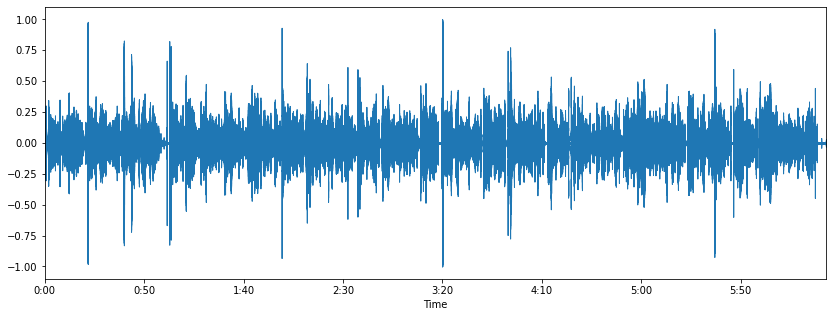

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveplot(x[0], sr=44000)

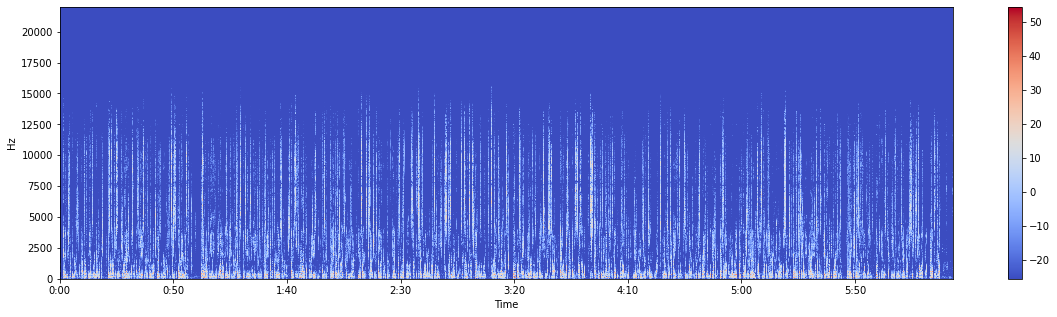

In [ ]:
#x: numpy array
#Spectogram to show how energy levels vary over time (Visual representation of spectrum of frequencies)
X = librosa.stft(x[0])
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


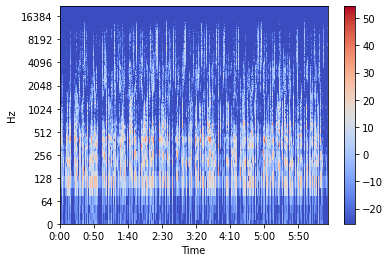

In [ ]:
#Log-frequency axis
#above spectogram to log-frequency spectrogram
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


**Feature** **Extraction**

**through zero crossing**

4


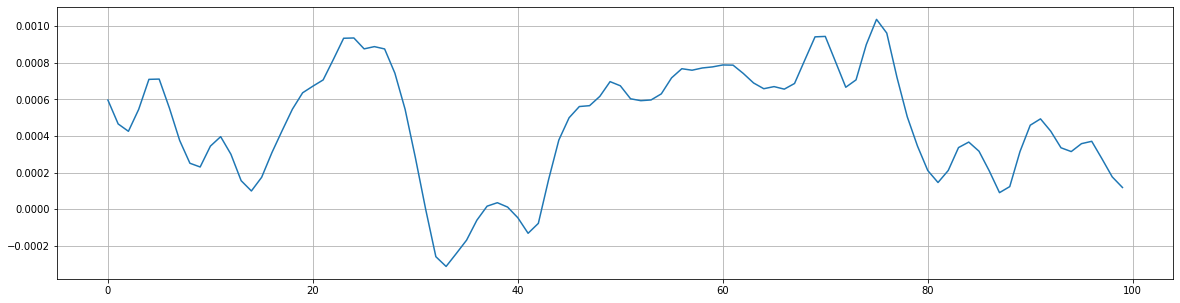

In [ ]:
x_=x[0]
#zero crossings to be found between a given time
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x_[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x_[n0:n1], pad=False)
zero_crossings.shape
print(sum(zero_crossings))

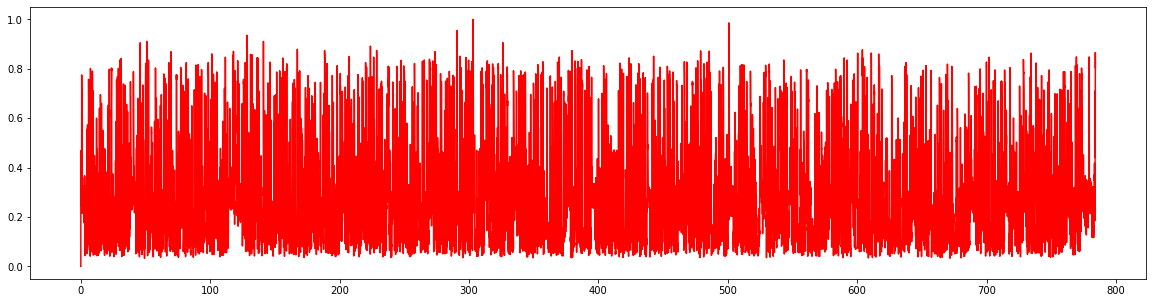

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x_, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
#librosa.display.waveplot(x_, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

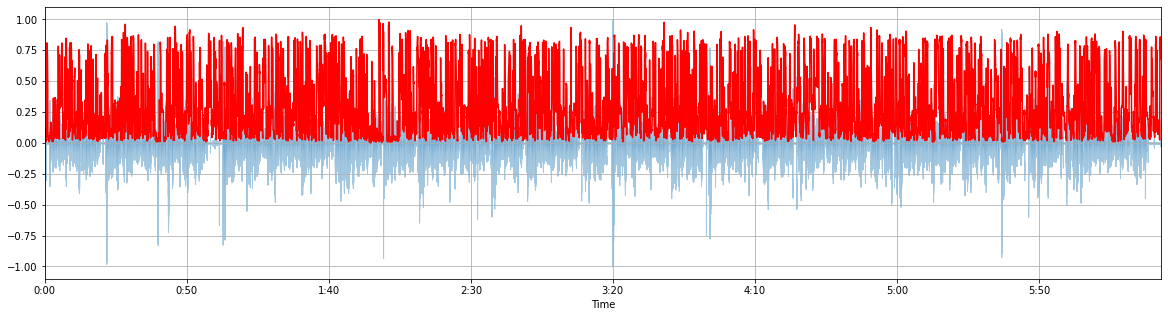

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x_+0.01, sr=sr)[0]
librosa.display.waveplot(x_, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

**through Mfcc**

(20, 33770)


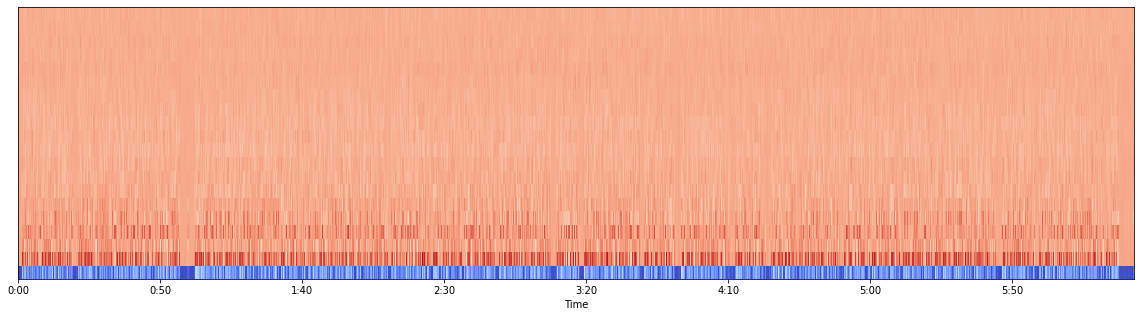

In [ ]:
#MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x_, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
#Feature Scaling so that each coefficient dimension has zero mean and unit variance
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 4.81410062e-16  2.52487795e-17  3.11401614e-17  1.91890724e-16
 -2.01990236e-17  7.57463384e-18 -1.26243897e-17 -1.68325197e-18
  1.93573976e-17 -1.85157716e-17  5.89138188e-17  4.37645511e-17
  6.56468266e-17  2.35655275e-17 -2.01990236e-17  1.30452027e-17
 -1.26243897e-17  1.17827638e-17 -5.84930058e-17 -8.45834112e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**through chroma frequecy**

[[0.         0.         0.69547093 ... 0.85147108 0.46769087 0.24232903]
 [0.         0.         0.77337598 ... 0.6288158  0.28648235 0.21008828]
 [0.         0.         0.84389707 ... 0.50933065 0.20591584 0.15496085]
 ...
 [0.         0.         0.67559041 ... 0.75728794 0.77417452 0.81858967]
 [0.         0.         0.616516   ... 1.         1.         1.        ]
 [0.         0.         0.61715472 ... 0.68054983 0.38332377 0.30547841]]


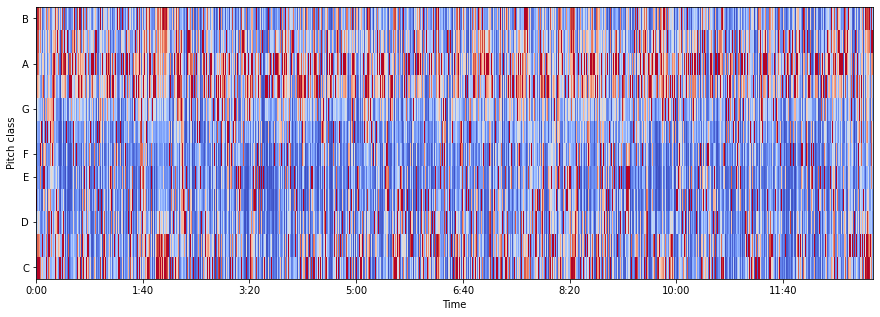

In [ ]:
hop_length = 512
# returns normalized energy for each chroma bin at each frame.
chromagram = librosa.feature.chroma_stft(x_, sr=sr, hop_length=hop_length)
print(chromagram)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

**Crepe**

In [ ]:
!pip install crepe

     |████████████████████████████████| 368kB 7.5MB/s 
  Created wheel for crepe: filename=crepe-0.0.11-cp36-none-any.whl size=134848478 sha256=981b83ade61470eec710a31137a0f489f203dd74fd9dfc918a50ef3265ef9da8
  Stored in directory: /root/.cache/pip/wheels/7f/68/d0/502d27bfe590bfa51c6fe95cf9e4482fed18c22c480a8d7c77
Successfully built crepe


In [ ]:
import crepe
from scipy.io import wavfile

sr, audio = wavfile.read('/content/audio.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)

/usr/local/lib/python3.6/dist-packages/crepe/core.py:209: RuntimeWarning: invalid value encountered in true_divide
  frames /= np.std(frames, axis=1)[:, np.newaxis]


1228/1228 [==============================] - 2015s 2s/step


In [ ]:
import pandas as pd

df = pd.DataFrame()

df = pd.DataFrame(columns=['time', 'frequency','confidence','activation'])
df['time']=time
df['frequency']=frequency
df['confidence']=confidence
df['activation']=activation
print(df.head(50))



    time   frequency  confidence  activation
0   0.00  149.059475         NaN         NaN
1   0.01  148.600456    0.313526    0.000351
2   0.02  149.572796    0.036810    0.010067
3   0.03  145.922865    0.114654    0.006710
4   0.04  135.099196    0.175020    0.000809
5   0.05  131.714541    0.162195    0.001398
6   0.06  127.916062    0.164617    0.001313
7   0.07  123.917712    0.497271    0.000332
8   0.08  122.536786    0.148882    0.001430
9   0.09  121.296522    0.110364    0.000735
10  0.10  119.174135    0.086983    0.000262
11  0.11  117.431784    0.112410    0.000599
12  0.12  116.071655    0.160614    0.001017
13  0.13  116.819292    0.089959    0.001349
14  0.14  117.679536    0.072304    0.001724
15  0.15  119.890286    0.088458    0.000551
16  0.16  118.482994    0.054499    0.000517
17  0.17  117.465337    0.167528    0.000453
18  0.18  115.879204    0.055791    0.000222
19  0.19  116.911360    0.269353    0.000122
20  0.20  119.621516    0.144494    0.000082
21  0.21  